<a href="https://colab.research.google.com/github/AsminiKOD/ClientPredicting/blob/NeuralNetworks/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Model

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping

# Load the pre-processed dataset
data = pd.read_csv('bank-scaled.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['y'])
y = (data['y'] > 0).astype(int)

# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42, sampling_strategy=0.6, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Build the neural network with more layers and dropout
model = Sequential([
    Dense(128, input_dim=X_train_balanced.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and a custom learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train_balanced, y_train_balanced, epochs=60, batch_size=32 , verbose=0, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Training Report
y_train_pred_prob = model.predict(X_train_balanced)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
train_auc = roc_auc_score(y_train_balanced, y_train_pred_prob)

print("Training Set Report:")
print(classification_report(y_train_balanced, y_train_pred))
print(f"Training ROC AUC: {train_auc:.4f}")

# Testing Report
y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)
test_auc = roc_auc_score(y_test, y_test_pred_prob)

print("Testing Set Report:")
print(classification_report(y_test, y_test_pred))
print(f"Testing ROC AUC: {test_auc:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

1372/1372 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Training Set Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84     27438
           1       0.78      0.62      0.69     16462

    accuracy                           0.79     43900
   macro avg       0.79      0.76      0.77     43900
weighted avg       0.79      0.79      0.79     43900

Training ROC AUC: 0.8591
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Testing Set Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1395
           1       0.40      0.61      0.48       161

    accuracy                           0.86      1556
   macro avg       0.68      0.75      0.70      1556
weighted avg       0.90      0.86      0.88      1556

Testing ROC AUC: 0.8158


###Visualization

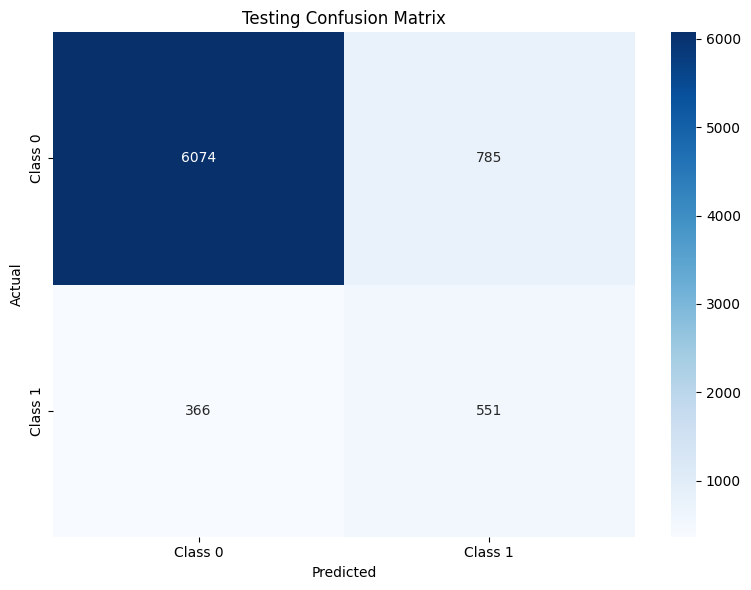

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for training data
test_cm = confusion_matrix(y_test, y_test_pred)

# Visualize confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
